# Working with Custom Images




The Kaggle Competition: [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) includes 25,000 images of cats and dogs. We will be building a classifier that works with these images and attempt to detect dogs versus cats!

The pictures are numbered 0-12499 for both cats and dogs, thus we have 12,500 images of Dogs and 12,500 images of Cats. This is a huge dataset!!


In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import keras


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cat4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [ ]:
type(cat4)

numpy.ndarray

array([[[140, 129, 123],
        [141, 130, 124],
        [144, 133, 127],
        ...,
        [170, 164, 164],
        [177, 171, 171],
        [184, 178, 178]],

       [[140, 129, 123],
        [141, 130, 124],
        [144, 133, 127],
        ...,
        [168, 163, 160],
        [173, 167, 167],
        [178, 173, 170]],

       [[140, 129, 123],
        [141, 130, 124],
        [144, 133, 127],
        ...,
        [164, 159, 155],
        [166, 161, 158],
        [168, 163, 159]],

       ...,

       [[155, 144, 124],
        [109,  98,  78],
        [ 63,  54,  37],
        ...,
        [  5,  17,  15],
        [  5,  17,  15],
        [  6,  18,  16]],

       [[149, 138, 118],
        [108,  97,  77],
        [ 64,  55,  38],
        ...,
        [  4,  16,  14],
        [  5,  17,  15],
        [  6,  18,  16]],

       [[ 81,  70,  50],
        [ 57,  46,  26],
        [ 29,  20,   3],
        ...,
        [  5,  17,  15],
        [  6,  18,  16],
        [  7,  19,  17]]], dtype=uint8)
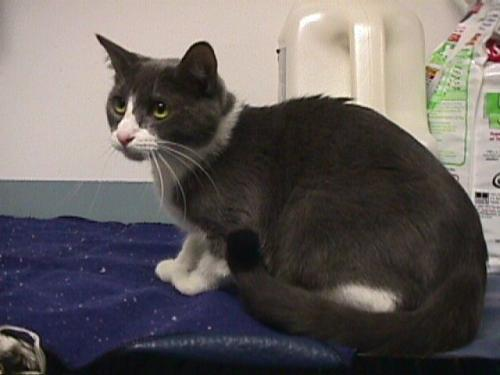

In [ ]:
cat4

In [ ]:
cat4.shape

(375, 500, 3)

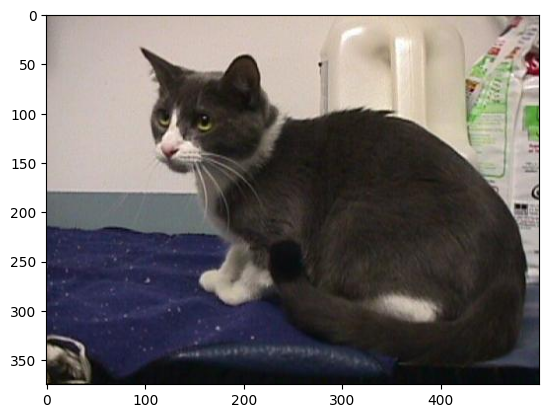

In [ ]:
plt.imshow(cat4)

In [ ]:
# dog2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/CATS_DOGS/train/Dog/8.jpg')
# dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [ ]:
# dog2.shape

In [ ]:
# plt.imshow(dog2)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

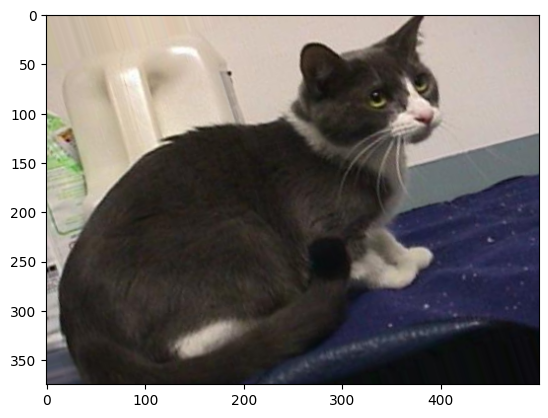

In [ ]:
plt.imshow(image_gen.random_transform(cat4))

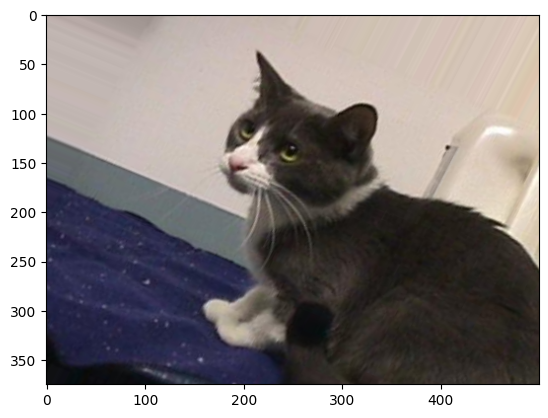

In [ ]:
plt.imshow(image_gen.random_transform(cat4))

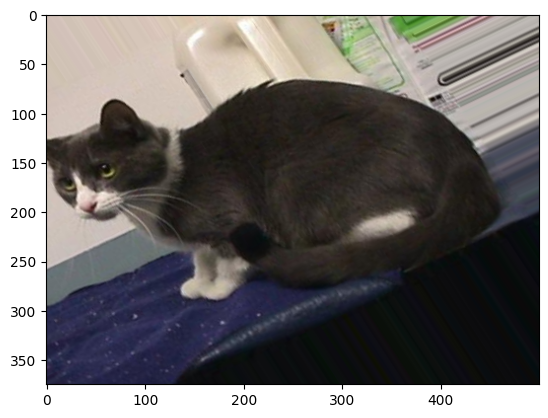

In [ ]:
plt.imshow(image_gen.random_transform(cat4))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [ ]:
# image_gen.flow_from_directory('../DATA/CATS_DOGS/train')

In [ ]:
# image_gen.flow_from_directory('../DATA/CATS_DOGS/test')

### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [ ]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [ ]:
# image_shape = (150,150,3)

batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
test_image_gen

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit(train_image_gen, epochs=1, validation_data=test_image_gen)

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 7111s 6s/step - accuracy: 0.5455 - loss: 0.6904 - val_accuracy: 0.5810 - val_loss: 0.6688


In [ ]:
# results = model.fit_generator(train_image_gen,epochs=1, validation_data=test_image_gen)

# Evaluating the Model

In [ ]:
results.history['accuracy']

[0.5592488050460815]

In [ ]:
model.save('cat_dog.h5')

# Predicting on new images

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
cat_file = '/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/CATS_DOGS/train/CAT/6.jpg'

In [ ]:
cat_file = image.load_img(cat_file, target_size=(150, 150))

In [ ]:
cat_file = image.img_to_array(cat_file)

In [ ]:
cat_file = np.expand_dims(cat_file, axis=0)
cat_file = cat_file/255

# prediction

In [ ]:
prediction_prob = model.predict(cat_file)
print('Probability that image is a cat is{}'.format(prediction_prob))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Probability that image is a cat is[[0.6270388]]


# save and load

In [ ]:
from keras.models import load_model

In [ ]:
new_model = load_model('cat_dog.h5')

In [ ]:
new_model.predict(cat_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[0.6270388]], dtype=float32)